In [36]:
import sys

sys.path.append("../src")

from data_loader import download_prices_adj_close
from risk_metrics import compute_returns
from markowitz_monte_carlo import simulate_portfolios


tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
prices = download_prices_adj_close(tickers, start='2024-08-01', end='2025-08-01')
returns = compute_returns(prices)



[*********************100%***********************]  5 of 5 completed


In [38]:
from markowitz_monte_carlo import simulate_portfolios
simulated_portfolios = simulate_portfolios(returns, n_simulations=5000)


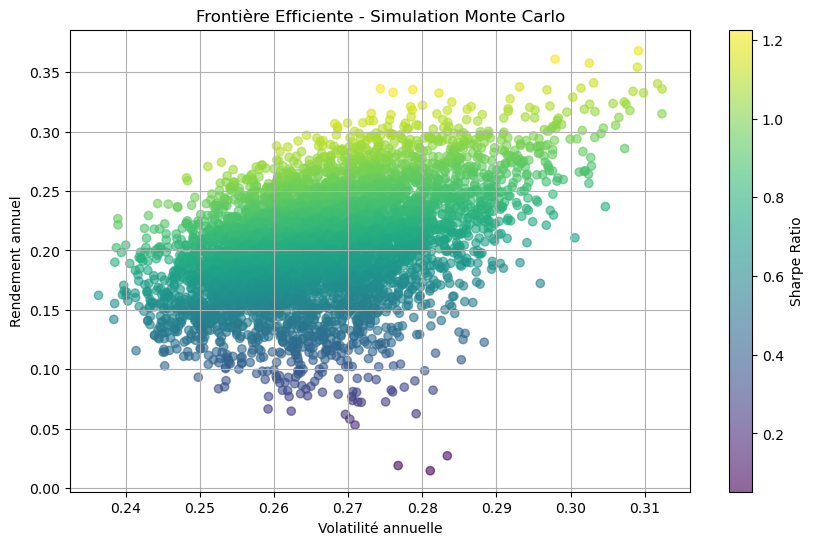

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(simulated_portfolios['volatility'],
                      simulated_portfolios['return'],
                      c=simulated_portfolios['sharpe'],
                      cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Volatilité annuelle')
plt.ylabel('Rendement annuel')
plt.title('Frontière Efficiente - Simulation Monte Carlo')
plt.grid(True)
plt.show()


In [46]:
# Identification des portefeuilles optimaux
idx_sharpe_max = simulated_portfolios['sharpe'].idxmax()
idx_return_max = simulated_portfolios['return'].idxmax()
idx_vol_min = simulated_portfolios['volatility'].idxmin()

# Extraction des lignes optimales
opt_sharpe = simulated_portfolios.loc[idx_sharpe_max]
opt_return = simulated_portfolios.loc[idx_return_max]
opt_vol = simulated_portfolios.loc[idx_vol_min]

# Fonction d'affichage formaté
def display_portfolio(title, simulated_portfolios, tickers):
    print(f"\n {title}")
    print(f"→ Rendement : {simulated_portfolios['return']:.2%}")
    print(f"→ Volatilité : {simulated_portfolios['volatility']:.2%}")
    print(f"→ Sharpe : {simulated_portfolios['sharpe']:.2f}")
    print("→ Poids :")
    for ticker, weight in zip(tickers, simulated_portfolios['weights']):
        print(f"   {ticker}: {weight:.2%}")

# Affichage des résultats
display_portfolio("Portefeuille à Sharpe maximal", opt_sharpe, tickers)
display_portfolio("Portefeuille à Rendement maximal", opt_return, tickers)
display_portfolio("Portefeuille à Volatilité minimale", opt_vol, tickers)



 Portefeuille à Sharpe maximal
→ Rendement : 33.62%
→ Volatilité : 27.44%
→ Sharpe : 1.23
→ Poids :
   AAPL: 0.28%
   MSFT: 2.40%
   GOOGL: 2.42%
   AMZN: 43.50%
   META: 51.40%

 Portefeuille à Rendement maximal
→ Rendement : 36.81%
→ Volatilité : 30.92%
→ Sharpe : 1.19
→ Poids :
   AAPL: 1.21%
   MSFT: 14.05%
   GOOGL: 2.90%
   AMZN: 62.65%
   META: 19.18%

 Portefeuille à Volatilité minimale
→ Rendement : 16.23%
→ Volatilité : 23.63%
→ Sharpe : 0.69
→ Poids :
   AAPL: 22.36%
   MSFT: 0.93%
   GOOGL: 23.58%
   AMZN: 2.58%
   META: 50.54%
